# Pytorch Workflow

1. Data preparation
2. Build model
3. Fitting model to the data (training)
4. Making predictions and evaluating a model (inference)
5. Saving and loading model


## 1. Data preparation


### 1.1 Import library

In [ ]:
# Import PyTorch and Matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 1.2 Create dataset

In [ ]:
# Create some data using the linear regression formula of y = weights*x + bias
weight = 0.8
bias = 0.2

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2160],
         [0.2320],
         [0.2480],
         [0.2640],
         [0.2800],
         [0.2960],
         [0.3120],
         [0.3280],
         [0.3440]]))

### 1.3 Split data

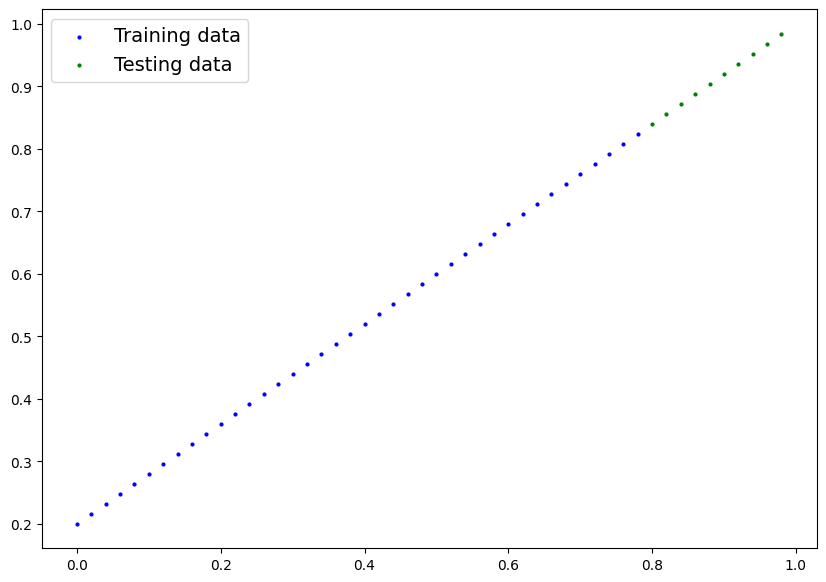

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data, and compare predicitions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data  in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data" )

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14});

plot_predictions(X_train, y_train, X_test, y_test)

## 2. Building a PyTorch Linear Model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters, also called linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

## 6.3 Fitting model to the data
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
# Lets write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # Print out whats happening
  if epoch % 10 == 0:
    print(f"epoch: {epoch} | loss: {loss} | Test loss: {test_loss}")

epoch: 0 | loss: 0.6161779165267944 | Test loss: 0.5849762558937073
epoch: 10 | loss: 0.5009680986404419 | Test loss: 0.45026642084121704
epoch: 20 | loss: 0.3857581913471222 | Test loss: 0.3155565857887268
epoch: 30 | loss: 0.2705483138561249 | Test loss: 0.180846706032753
epoch: 40 | loss: 0.15533843636512756 | Test loss: 0.046136897057294846
epoch: 50 | loss: 0.05875825881958008 | Test loss: 0.06886561214923859
epoch: 60 | loss: 0.04580378159880638 | Test loss: 0.09473040699958801
epoch: 70 | loss: 0.041819483041763306 | Test loss: 0.09405827522277832
epoch: 80 | loss: 0.03831038996577263 | Test loss: 0.08853326737880707
epoch: 90 | loss: 0.034879546612501144 | Test loss: 0.08094760775566101
epoch: 100 | loss: 0.03144557774066925 | Test loss: 0.07267507165670395
epoch: 110 | loss: 0.028006771579384804 | Test loss: 0.06440252810716629
epoch: 120 | loss: 0.024577612057328224 | Test loss: 0.056816864758729935
epoch: 130 | loss: 0.021141953766345978 | Test loss: 0.04854437708854675
epoc

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

In [ ]:
weight, bias

(0.8, 0.2)

## 6.4 Making predictions and evaluating a model

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8484],
        [0.8644],
        [0.8804],
        [0.8964],
        [0.9123],
        [0.9283],
        [0.9443],
        [0.9603],
        [0.9762],
        [0.9922]], device='cuda:0')

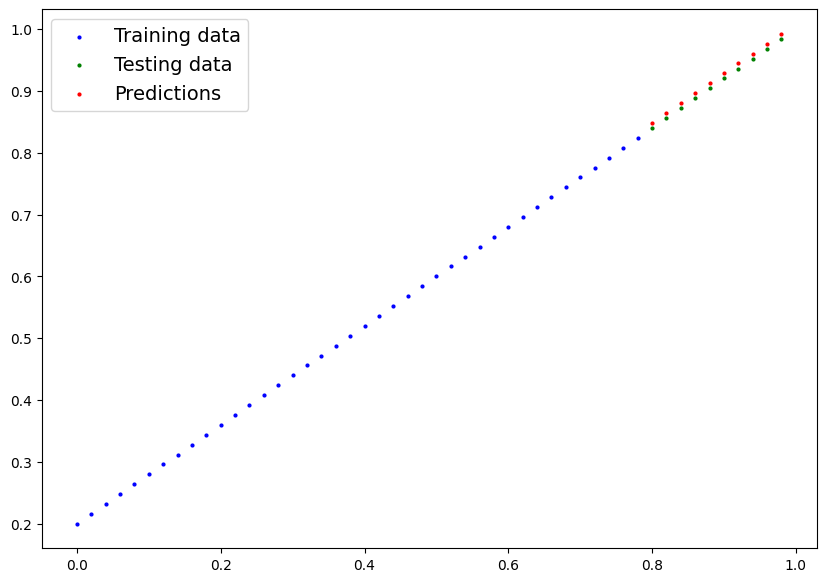

In [ ]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

## 6.5 Saving and loading trained model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

In [ ]:
# Load a PyTorch

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')